# <center>Linear Regression</center>

__Problem Statement__<br>:
using linear regression we will construct a linear model that explains the relationship of cars mileage(mpg) and other attributes

In [8]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
1. All independent variable will be along x-axis
2. Dependent variable will be along y-axis(here it is mpg)

In [16]:
car_data=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/auto-mpg.csv")

In [17]:
car_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [18]:
car_data.shape

(398, 9)

In [19]:
car_data.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [20]:
car_data.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

In [21]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [22]:
car_data.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [23]:
car_data.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
128,15.0,6,250.0,100,3336,17.0,74,1,chevrolet nova
176,19.0,6,232.0,90,3211,17.0,75,1,amc pacer
124,11.0,8,350.0,180,3664,11.0,73,1,oldsmobile omega
212,16.5,8,350.0,180,4380,12.1,76,1,cadillac seville
154,15.0,6,250.0,72,3432,21.0,75,1,mercury monarch
295,35.7,4,98.0,80,1915,14.4,79,1,dodge colt hatchback custom
338,27.2,4,135.0,84,2490,15.7,81,1,plymouth reliant
63,14.0,8,400.0,175,4385,12.0,72,1,pontiac catalina
147,24.0,4,90.0,75,2108,15.5,74,2,fiat 128
16,18.0,6,199.0,97,2774,15.5,70,1,amc hornet


In [24]:
#dropping unwanted column
car_data=car_data.drop('car name',axis=1)
car_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [25]:
#replacing origin with actual values
car_data['origin']=car_data['origin'].replace({1:'america',2:'europe',3:'asia'})
car_data.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
187,17.5,8,305.0,140,4215,13.0,76,america
40,14.0,8,351.0,153,4154,13.5,71,america
14,24.0,4,113.0,95,2372,15.0,70,asia
6,14.0,8,454.0,220,4354,9.0,70,america
232,16.0,8,351.0,149,4335,14.5,77,america
31,25.0,4,113.0,95,2228,14.0,71,asia
128,15.0,6,250.0,100,3336,17.0,74,america
63,14.0,8,400.0,175,4385,12.0,72,america
117,29.0,4,68.0,49,1867,19.5,73,europe
253,20.5,6,200.0,95,3155,18.2,78,america


In [26]:
#one hot encoding
car_data=pd.get_dummies(car_data,columns=['origin'])
car_data.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
52,30.0,4,88.0,76,2065,14.5,71,0,0,1
388,26.0,4,156.0,92,2585,14.5,82,1,0,0
352,29.9,4,98.0,65,2380,20.7,81,1,0,0
157,15.0,8,350.0,145,4440,14.0,75,1,0,0
143,26.0,4,97.0,78,2300,14.5,74,0,0,1
216,31.5,4,98.0,68,2045,18.5,77,0,1,0
372,27.0,4,151.0,90,2735,18.0,82,1,0,0
365,20.2,6,200.0,88,3060,17.1,81,1,0,0
73,13.0,8,307.0,130,4098,14.0,72,1,0,0
78,21.0,4,120.0,87,2979,19.5,72,0,0,1


__Data Cleaning__

In [27]:
car_data['hp']=car_data['hp'].replace(to_replace='?',value=np.nan)
car_data['hp']=car_data['hp'].astype(float)

In [28]:
median=car_data['hp'].median()
car_data['hp'].replace(np.nan,median,inplace=True)

In [29]:
car_data.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


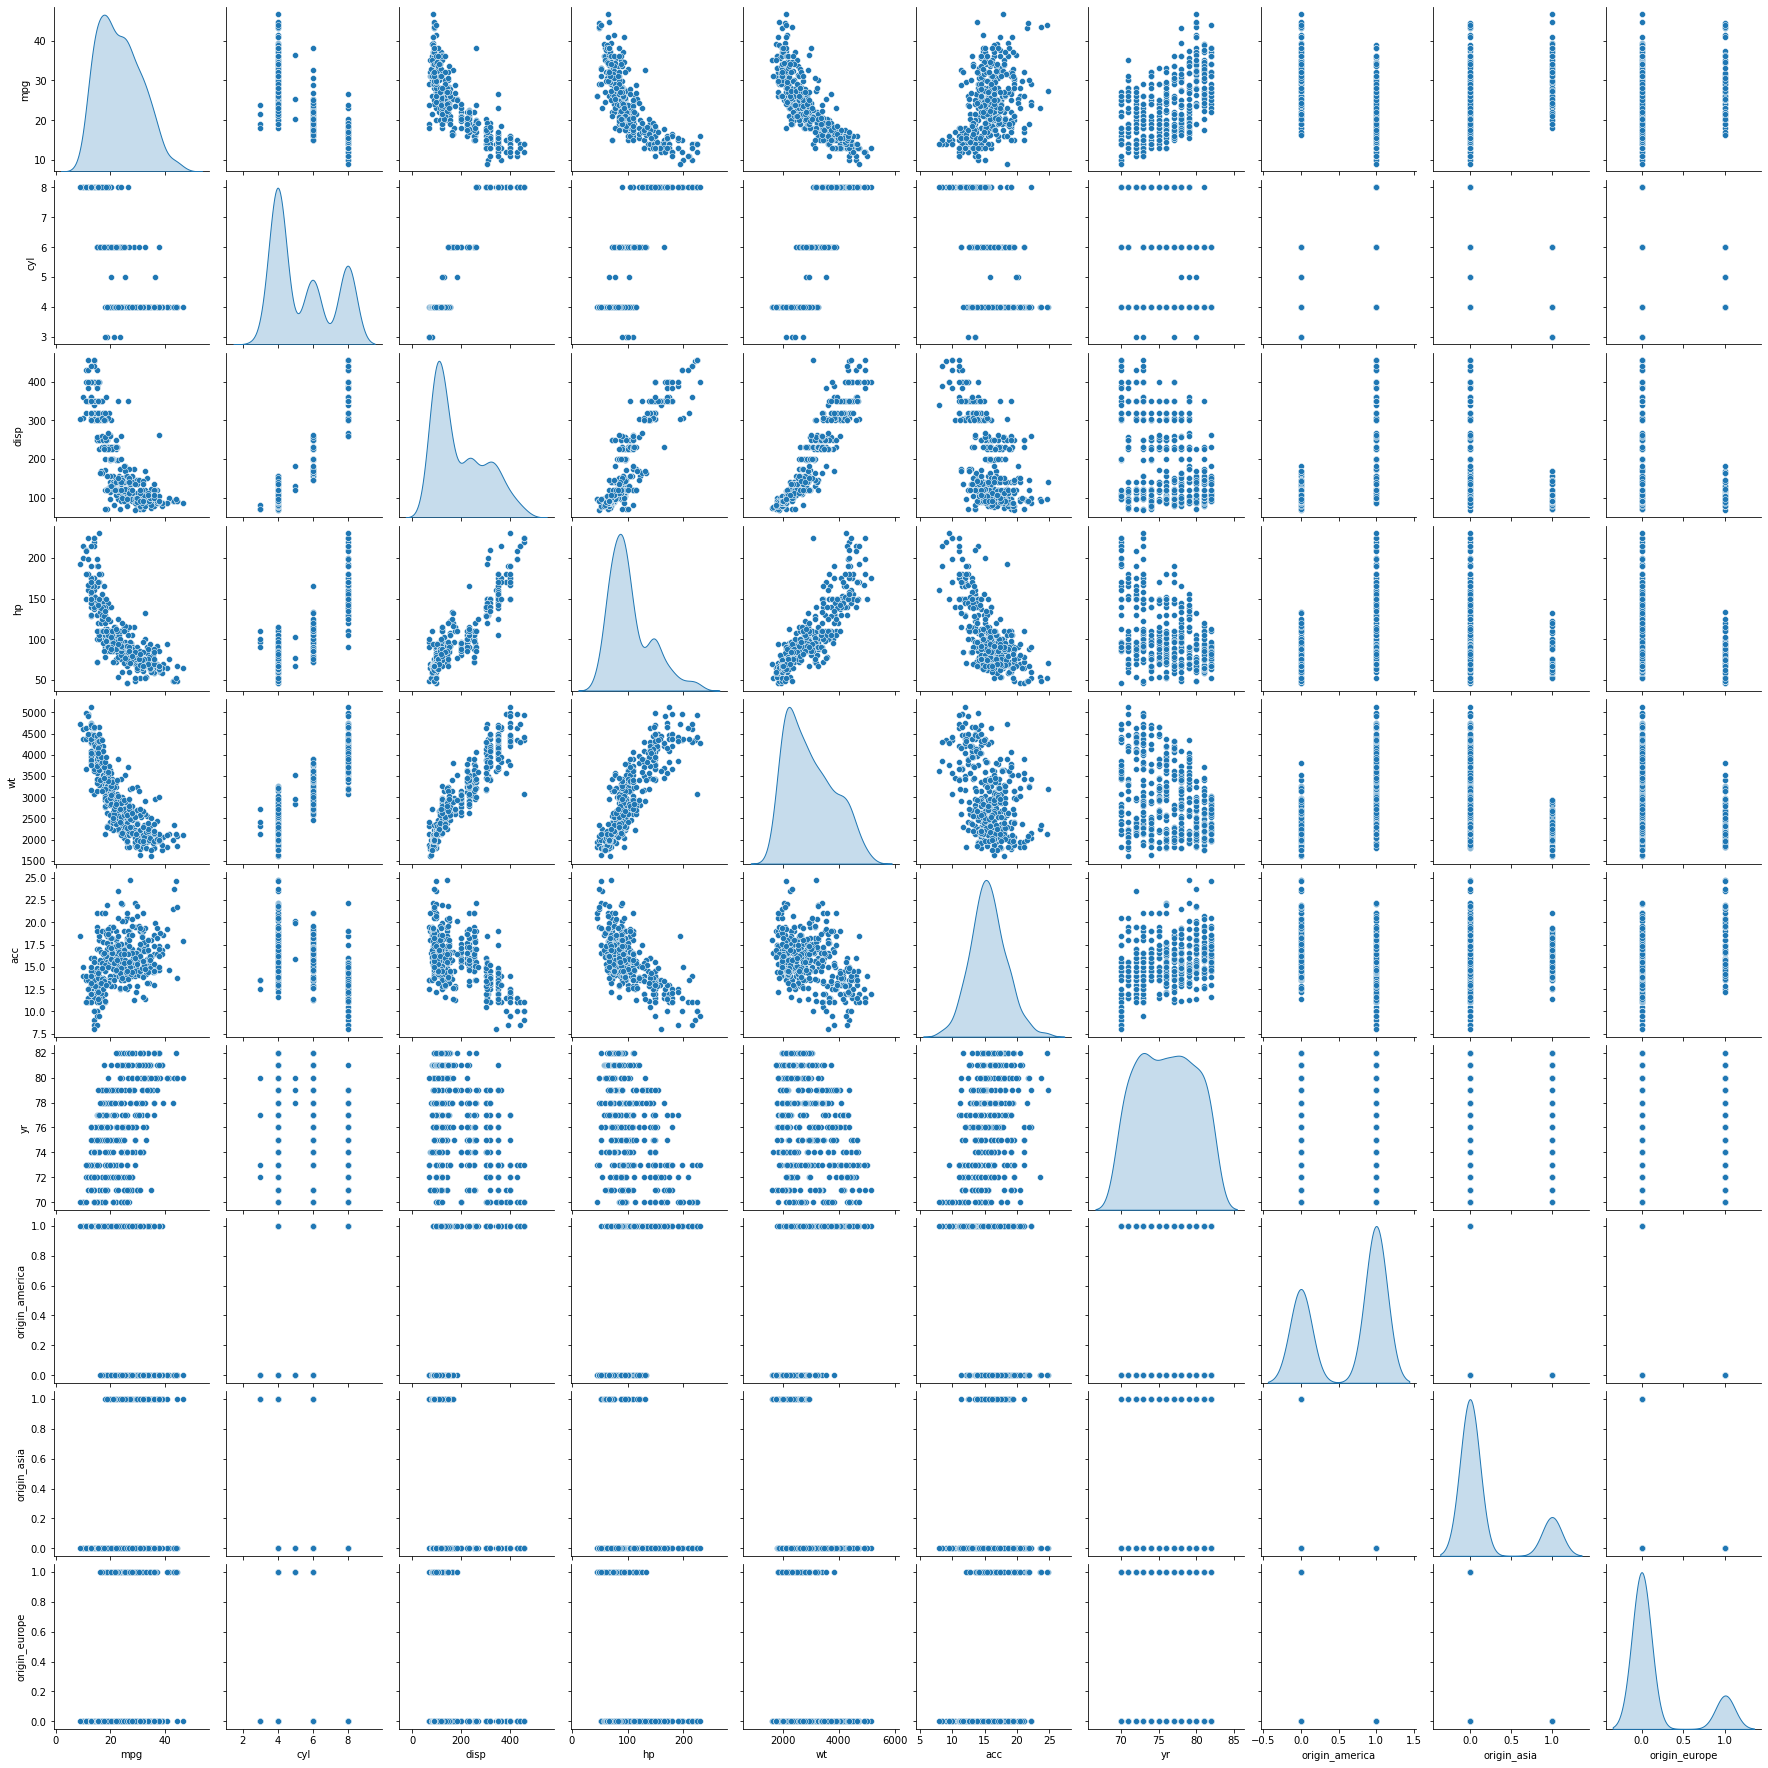

In [30]:
sns.pairplot(car_data,diag_kind='kde')

In [31]:
#Split Data
X=car_data.drop(['mpg'],axis=1)
#dependent variable
y=car_data[['mpg']]

In [32]:
#splitting into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [33]:
#fit linear model
reg_model=LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [34]:
reg_model.score(X_train,y_train)

0.8141025501610559

In [35]:
reg_model.score(X_test,y_test)

0.8433135132808829

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly=PolynomialFeatures(degree=2,interaction_only=True)
X_train2=poly.fit_transform(X_train)
X_test2=poly.fit_transform(X_test)

poly_clf=linear_model.LinearRegression()
poly_clf.fit(X_train2,y_train)
print(poly_clf.score(X_train2,y_train))

0.8995492105437926


In [47]:
print(poly_clf.score(X_test2,y_test))

0.861349075272287
